# _Flight Price Prediction_

**_Importing The Required Libraries & Packages_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pf
import os
import pickle
import cufflinks as cf
from chart_studio.plotly import plot,iplot
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**_Changing The Default Working Directory & Path_**

In [2]:
os.chdir('D:\\bala\\study things\\data science\\Batch 74 Day 38\\Batch 74 Day 38\\Project 12 Flight Price Predict Heroku\\')


**_Reading The Dataset Using Pandas Command_**

In [3]:
df=pd.read_excel('Data_Train.xlsx')

#### **_Automated Exploratory Data Analysis (EDA) with ydata_profiling(pandas_profiling)_**

In [4]:
display(pf.ProfileReport(df))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# _Data Cleaning_
**_Checking the Null values of all the Columns in the dataset_**

In [5]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**_Dropping all the null value from the dataset and Checking the Null values of all the Columns after dropping it._**

In [6]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**_Changing the Data Type to Date Time format using pandas command and adding two new columns by seperating the day and month from the <span style="color:blue">Date Of Journey</span> Column._**

In [7]:
df['Day_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=pd.to_datetime(df['Date_of_Journey']).dt.month

**_Changing the Data Type to Date Time format using pandas command and adding two new columns by seperating the hour and minute from the <span style='color:blue'>Departure Time</span> column._**

In [8]:
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

**_Changing the Data Type to Date Time format using pandas command and adding two new columns by seperating the hour and minute from the <span style='color:blue'>Arrival Time </span>column._**

In [9]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.hour

**_Assigning  the new variable and splitting hour and minute and extracting it from the <span style='color:blue'>Duration </span>column._**

In [10]:
duration=df['Duration'].str.split(' ',expand=True)

**_Filling out the null value to 00 minutes to the minutes column of the new variable_**

In [11]:
duration[1].fillna('00m',inplace=True)

**_Adding two new columns with the duration hour and duration minute from the assigned new variable columns_**

In [12]:
df['Duration_hr']=duration[0].apply(lambda x:x[:-1])
df['Duration_min']=duration[1].apply(lambda x:x[:-1])

**_Getting the unique value from the total stops columns_**

In [13]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

## _Visualizations_
**_Setting the configuration file and plotting the bar graph with Airlines and its Average price ; and saving the PNG file._**

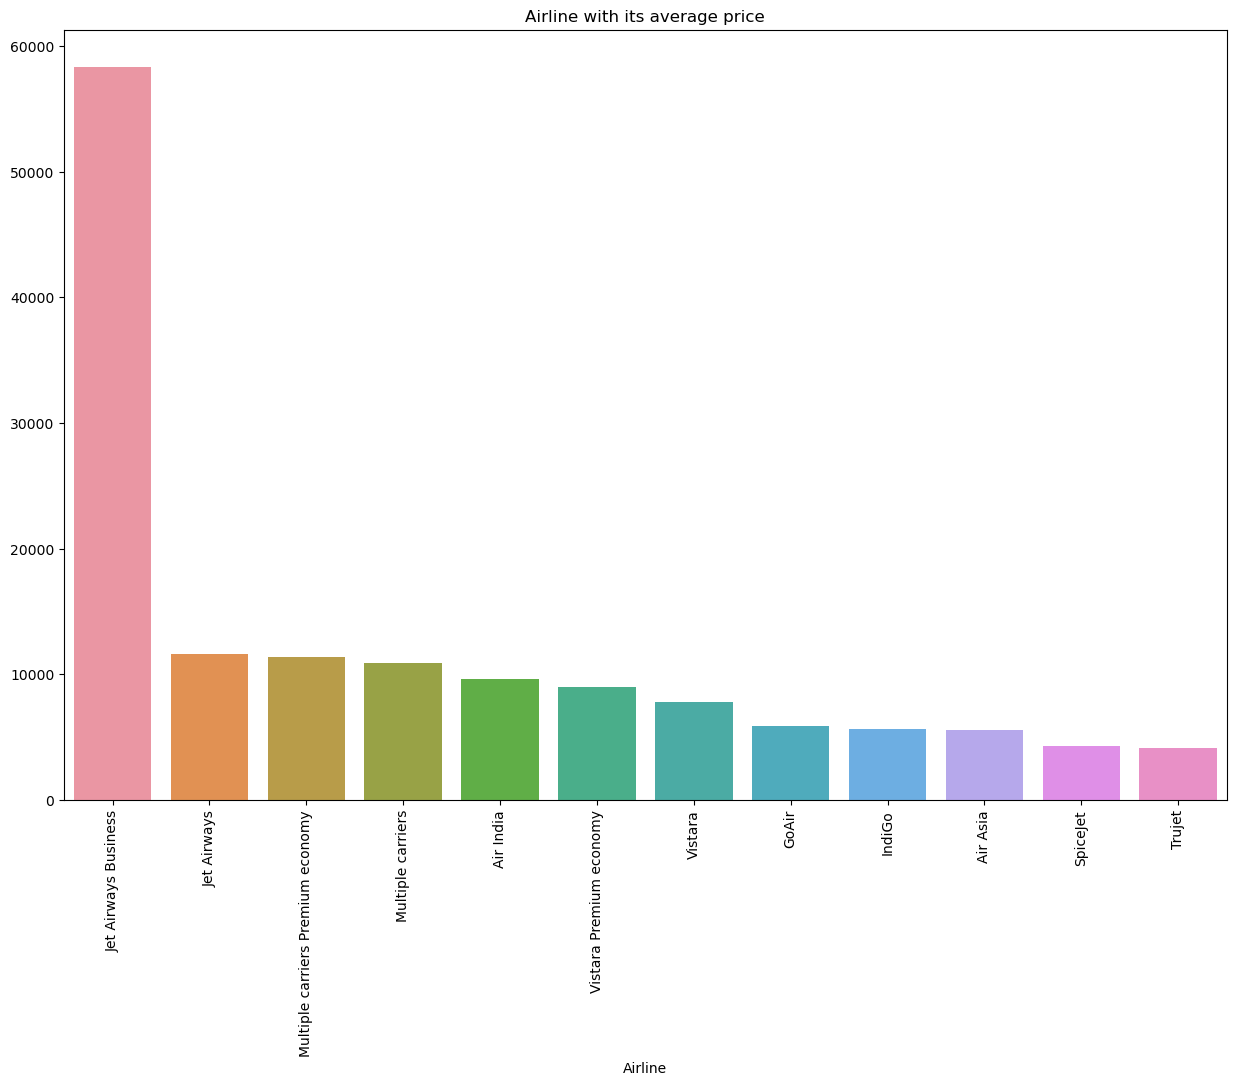

In [14]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=90)
plt.title('Airline with its average price')
plt.savefig('Airline with its average price.png')
plt.show()

**_Plotting the box plot graph with Airlines and its price ; and saving the Png file._**

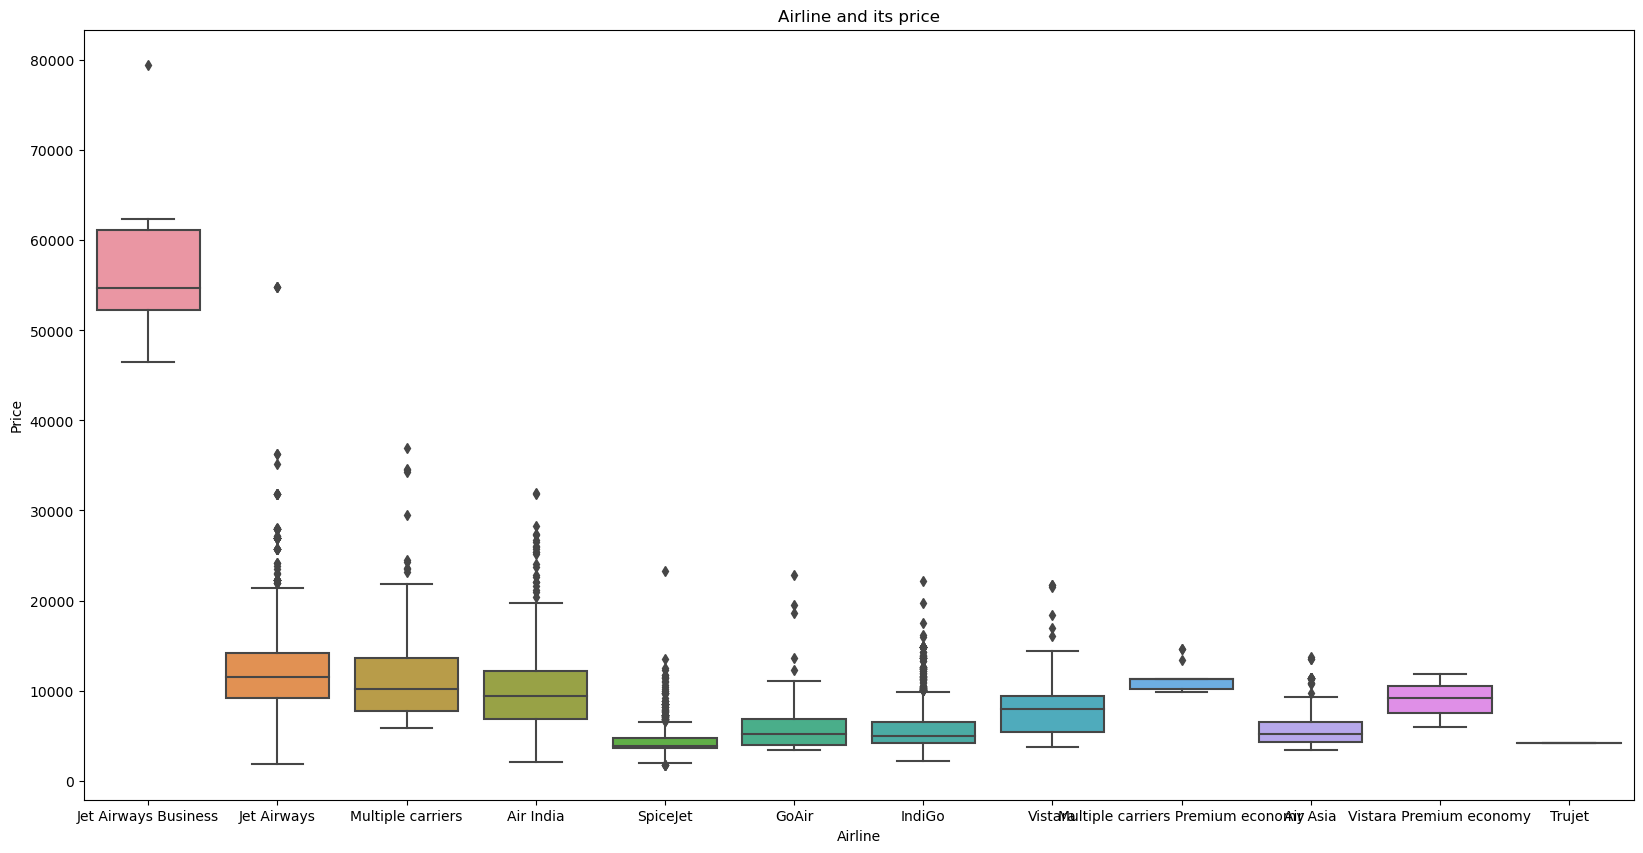

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.title('Airline and its price')
plt.savefig('Airline and its price.png')
plt.show()


**_Plotting the bar graph with Airlines its price and total stops ; and saving the Png file._**

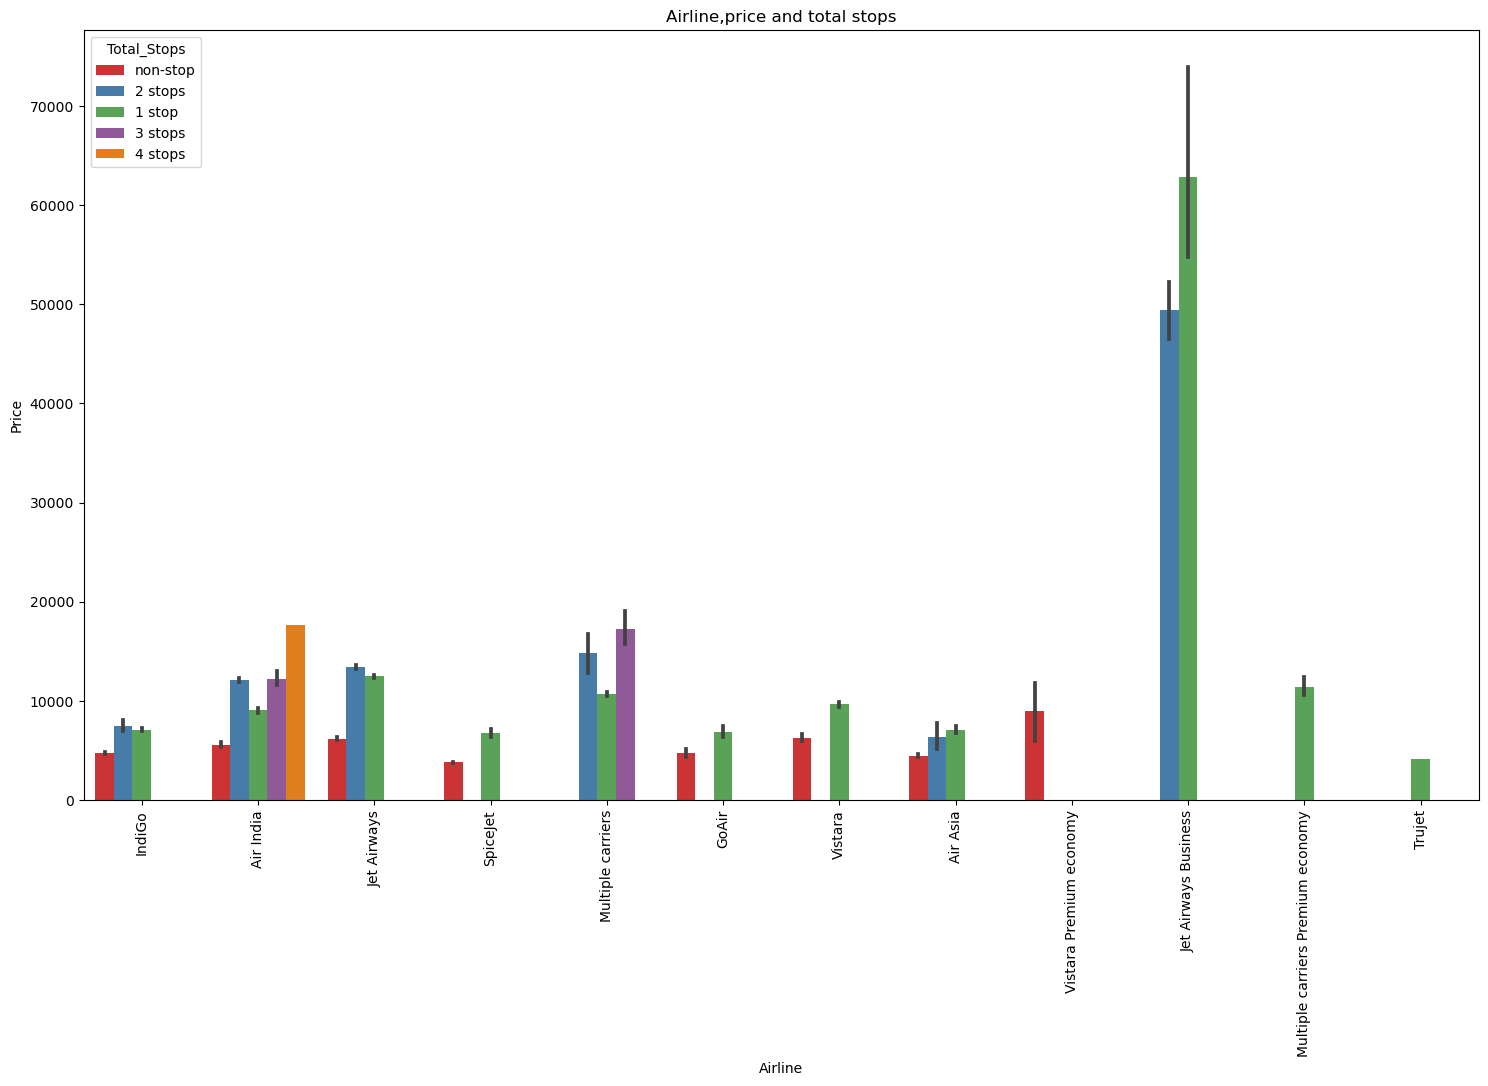

In [16]:

plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Airline,price and total stops')
plt.savefig('Airline,price and total stops.png')
plt.show()


**_Plotting the bar graph with Source and price ; and saving the Png file._**

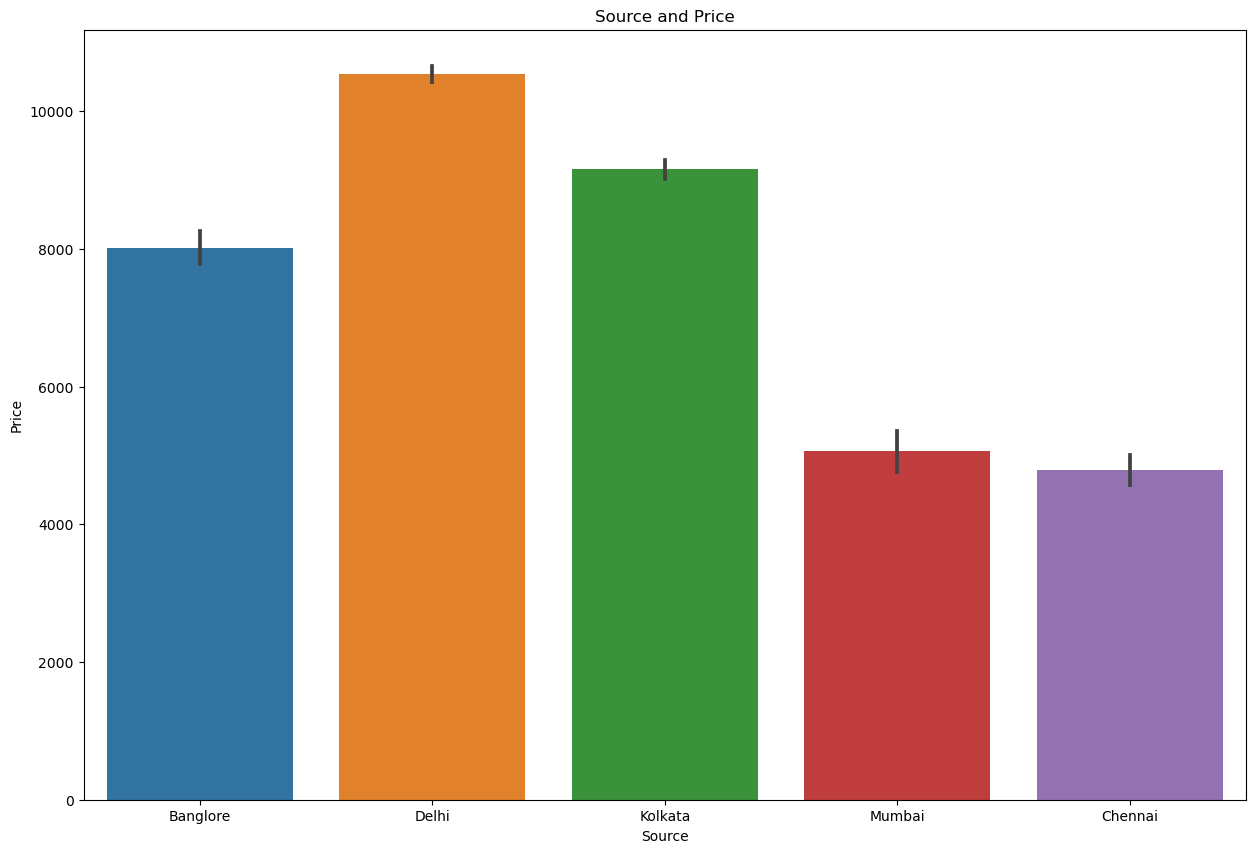

In [17]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.title('Source and Price')
plt.savefig('Source and Price.png')
plt.show()


**_Plotting the bar graph with Destination and price ; and saving the Png file._**

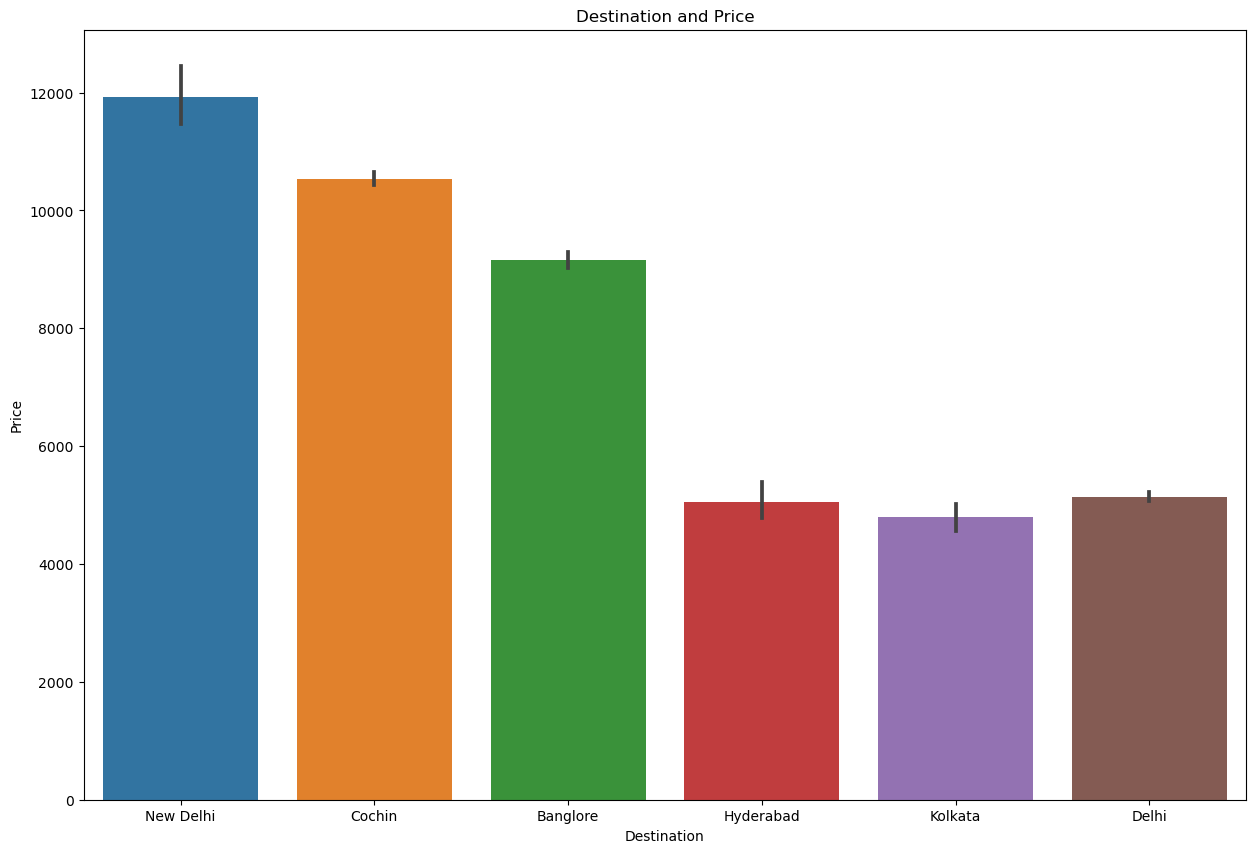

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.title('Destination and Price')
plt.savefig('Destination and Price.png')
plt.show()


**_Renaming the same cities under single name from the <span style='color:blue'>Destination</span> column._**

In [19]:
df['Destination']=df['Destination'].apply(lambda x:x.replace('New Delhi','Delhi'))

**_Checking the city names of the <span style='color:blue'>Destination</span> column after renaming it ._**

In [20]:
display(df['Destination'].unique())

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

**_Plotting the bar graph with Destination and price ; and saving the Png file._**

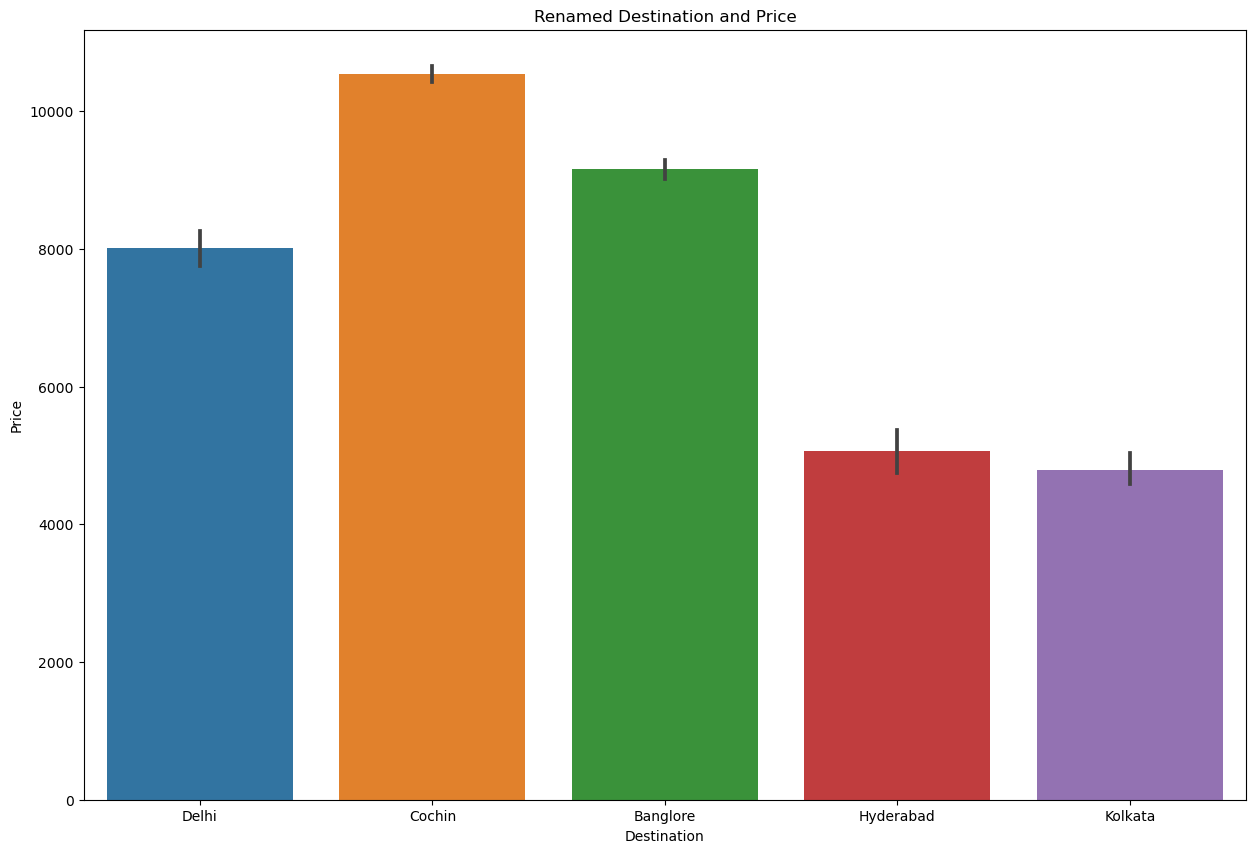

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.title('Renamed Destination and Price')
plt.savefig('Renamed Destination and Price.png')
plt.show()


**_Getting the correlation value from all the numeric columns from the independent variable using seaborn Heatmap & saving the PNG file_**

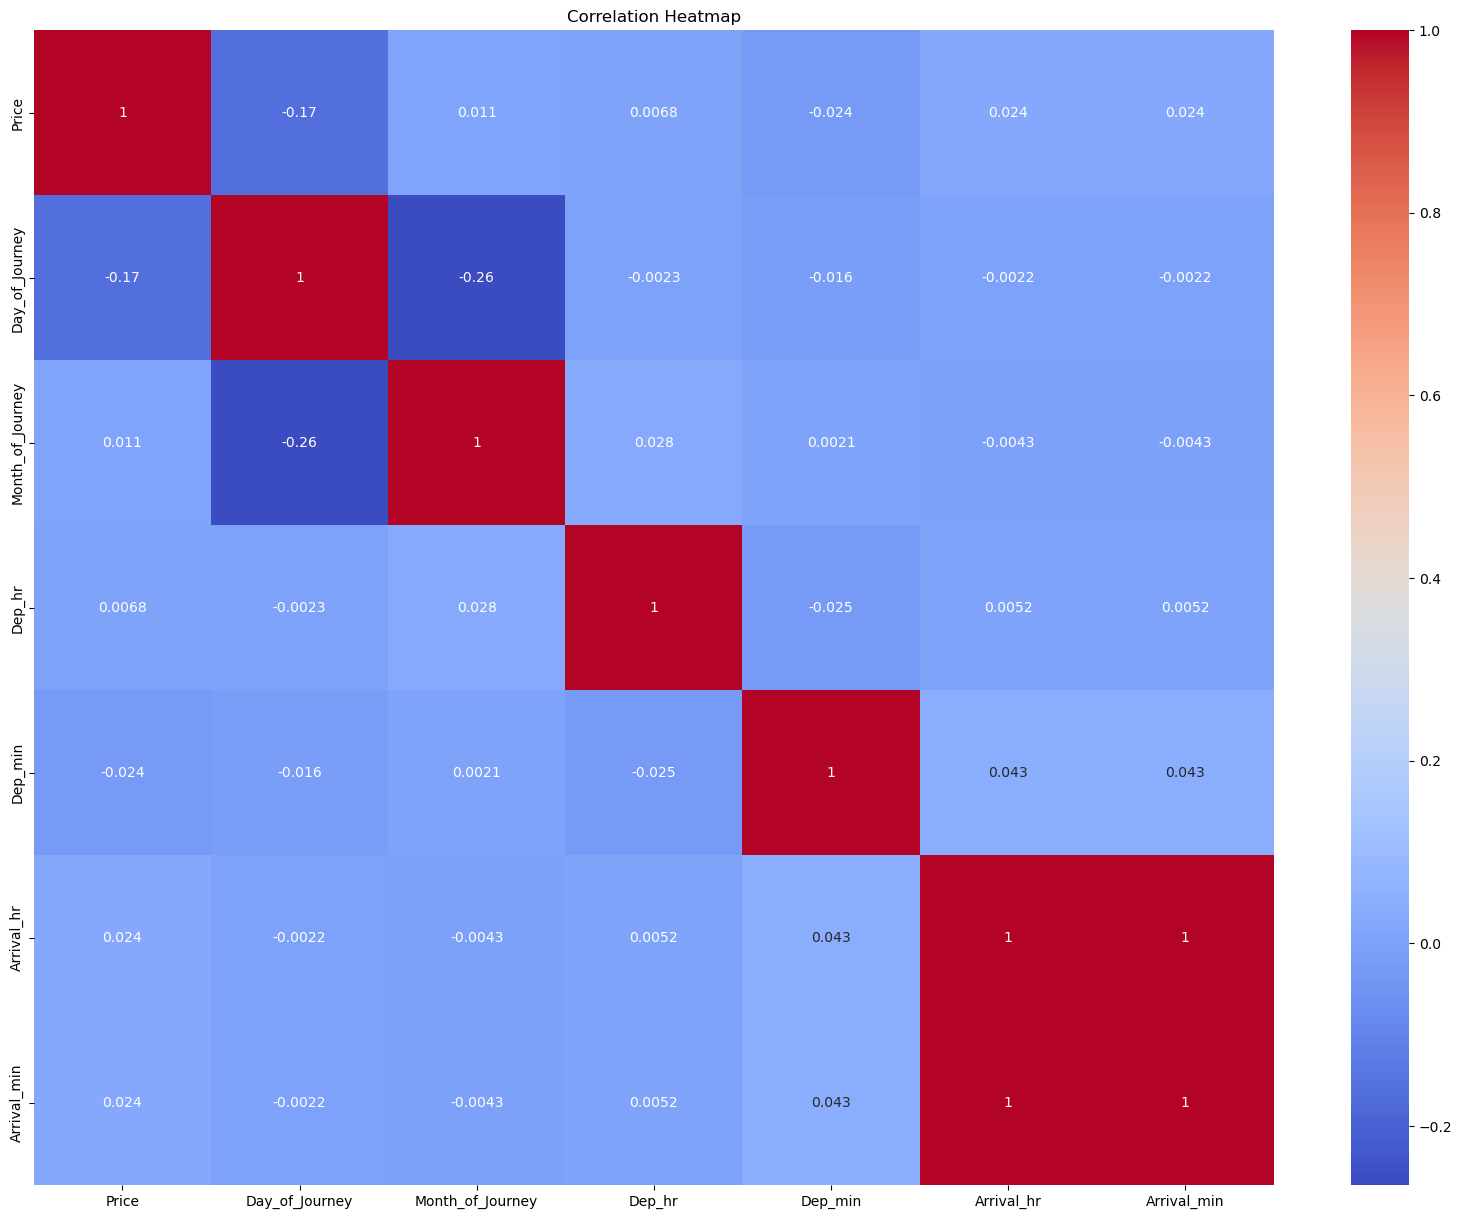

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap.png')
plt.show()


**_Label Encoding the <span style='color:blue'>Total Stops</span> columns using mapping function._**

In [23]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2,
                                         '1 stop':1, '3 stops':3, '4 stops':4})

**_One Hot Encoding the <span style='color:blue'>Airline</span>,<span style='color:blue'>Source</span>,<span style='color:blue'>Destination</span> columns using pandas  function._**

In [24]:
air_dum=pd.get_dummies(df['Airline'],drop_first=True)
sor_dest=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dum,sor_dest,df],axis=1)

**_Dropping the column <span style='color:blue'>Airline</span>,<span style='color:blue'>Source</span>,<span style='color:blue'>Destination</span> ,<span style='color:blue'>Route</span>,<span style='color:blue'>Duration</span>,<span style='color:blue'>Departure Time</span>,<span style='color:blue'>Data Of Journey</span>,<span style='color:blue'>Arrival Time</span>,<span style='color:blue'>Additional Information</span> of the column._**

In [25]:
df.drop(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 
       'Additional_Info'],axis=1,inplace=True)

**_Reading The Test Dataset Using Pandas Command_**

In [26]:
df_test = pd.read_excel('Test_set.xlsx')

## Data Cleaning of the Test Datset
**_Changing the Data Type to Date Time format using pandas command and adding two new columns by seperating the day and month from the Date Of Journey Column in the test data._**

In [27]:
df_test['Day_of_Journey']=pd.to_datetime(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=pd.to_datetime(df_test['Date_of_Journey']).dt.month

**_Changing the Data Type to Date Time format using pandas command and adding two new columns by seperating the hour and minute from the <span style='color:blue'>Departure Time</span> column in the test data._**

In [28]:
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

**_Changing the Data Type to Date Time format using pandas command and adding two new columns by seperating the hour and minute from the <span style='color:blue'>Arrival Time </span>column in the test data._**

In [29]:
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

In [30]:
df_test.Destination=df_test['Destination'].apply(lambda x:x.replace('New Delhi','Delhi'))

**_Assigning  the new variable and splitting hour and minute and extracting it from the <span style='color:blue'>Duration </span>column and Filling out the null value to 00 minutes to the minutes column of the new variable._**

In [31]:
dur=df_test['Duration'].str.split(' ',expand=True)
dur[1].fillna('00m',inplace=True)

**_Adding two new columns with the duration hour and duration minute from the assigned new variable columns in the test data_**

In [32]:
df_test['Duration_hr']=dur[0].apply(lambda x:x[:-1])
df_test['Duration_min']=dur[1].apply(lambda x:x[:-1])

**_One Hot Encoding the <span style='color:blue'>Airline</span>,<span style='color:blue'>Source</span>,<span style='color:blue'>Destination</span> columns of the test data  using pandas  function._**

In [33]:
air=pd.get_dummies(df_test['Airline'],drop_first=True)
sour_desti=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air,sour_desti,df_test],axis=1)

**_Getting the unique value from the total stops columns in the test data_**

In [34]:
df_test['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

**_Label Encoding the <span style='color:blue'>Total Stops</span> columns of test data using mapping function._**

In [35]:
df_test['Total_Stops']=df_test['Total_Stops'].map({'1 stop':1, 'non-stop':0,
                                                   '2 stops':2, '3 stops':3, '4 stops':4})

**_Dropping the column <span style='color:blue'>Airline</span>,<span style='color:blue'>Source</span>,<span style='color:blue'>Destination</span> ,<span style='color:blue'>Route</span>,<span style='color:blue'>Duration</span>,<span style='color:blue'>Depature Time</span>,<span style='color:blue'>Data Of Journey</span>,<span style='color:blue'>Arrival Time</span>,<span style='color:blue'>Additional Information</span> from the test data column which is not required._**

In [36]:
df_test.drop(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration',
       'Additional_Info'],axis=1,inplace=True)

**_Assigning the dependent and independent variables_**

In [37]:
x=df.drop(['Price'],axis=1)
y=df['Price']

**_Exporting the clean train data and test data to a comma seperated file(csv)._**

In [38]:
df.to_csv('Cleaned Data.csv',index=False)
df_test.to_csv('Cleaned Test Data.csv',index=False)

## _Model Fitting_
**_Splitting the dependent and independent variable into training and test dataset using train test split._**

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=44)

**_Fitting the Random Forest Regressor Model with the dependent and independent variable and getting the r2 Score between the predicted values and dependent test dataset_**

In [40]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2_score(y_test,y_pred)

0.8059489081048761

**_Fitting the random forest regressor model with the list of parameters in the RandomizedSearchCV Algorithm and getting the r2 Score between the predicted values and dependent test dataset_**

In [41]:
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',
                       n_iter=10,cv=3,random_state=42, n_jobs = 1)

rCV.fit(x_train,y_train)
rf_pred=rCV.predict(x_test)
r2_score(y_test,rf_pred)

0.8162508456640025

**_Getting the mean absolute error and mean squared error values between the predicted value from the RandomizedSearchCV and dependent test data set_**

In [42]:
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1196.2238563497442
MSE 3965003.7897665584


**_Fitting the Extra Trees Regressor Model with the dependent and independent variable and getting the r2 Score between the predicted values and dependent test dataset_**

In [43]:
ET=ExtraTreesRegressor(n_estimators=120)
ET.fit(x_train,y_train)
y_pred=ET.predict(x_test)
r2_score(y_test,y_pred)

0.7897449841763686

**_Fitting the Cat Boost Regressor Model with the dependent and independent variable and getting the r2 Score between the predicted values and dependent test dataset_**

In [44]:
cat=CatBoostRegressor()
cat.fit(x_train,y_train)
cat_pred=cat.predict(x_test)
r2_score(y_test,cat_pred)

Learning rate set to 0.056264
0:	learn: 4431.6994708	total: 139ms	remaining: 2m 18s
1:	learn: 4288.4586131	total: 144ms	remaining: 1m 11s
2:	learn: 4155.0642392	total: 147ms	remaining: 48.9s
3:	learn: 4033.0023842	total: 150ms	remaining: 37.4s
4:	learn: 3918.5522438	total: 152ms	remaining: 30.3s
5:	learn: 3803.1974731	total: 154ms	remaining: 25.5s
6:	learn: 3701.3640491	total: 156ms	remaining: 22.1s
7:	learn: 3611.7359018	total: 158ms	remaining: 19.6s
8:	learn: 3523.4712253	total: 161ms	remaining: 17.7s
9:	learn: 3447.4137645	total: 162ms	remaining: 16.1s
10:	learn: 3364.6153832	total: 165ms	remaining: 14.8s
11:	learn: 3293.4315885	total: 167ms	remaining: 13.7s
12:	learn: 3229.0013086	total: 168ms	remaining: 12.8s
13:	learn: 3165.9800914	total: 170ms	remaining: 12s
14:	learn: 3104.8997330	total: 172ms	remaining: 11.3s
15:	learn: 3051.6664353	total: 174ms	remaining: 10.7s
16:	learn: 2999.7076347	total: 176ms	remaining: 10.2s
17:	learn: 2955.7180857	total: 179ms	remaining: 9.74s
18:	lear

0.8656067767717617

**_Changing the data type of the <span style='color:blue'>Duration Hour </span>,<span style='color:blue'>Duration Minute </span> column from "Object" to "int" and Splitting the dependent and independent variable into training and test dataset using train test split._**

In [45]:
x_train[['Duration_hr','Duration_min']]=x_train[['Duration_hr','Duration_min']].astype(int)
x_test[['Duration_hr','Duration_min']]=x_test[['Duration_hr','Duration_min']].astype(int)

**_Fitting the Light GBMRegressor Model with the dependent and independent variable and getting the r2 Score between the predicted values and dependent test dataset_**

In [46]:
lgb=LGBMRegressor(random_state=0)
lgb.fit(x_train,y_train)
lgb_pred=lgb.predict(x_test)
r2_score(y_test,lgb_pred)

0.8107907456299009

**_Fitting the XGBoost Regressor with the dependent and independent variable and getting the r2 Score between the predicted values and dependent test dataset_**

In [47]:
XGB = XGBRegressor()
XGB.fit(x_train,y_train)
XGB_pred = XGB.predict(x_test)
r2_score(y_test,XGB_pred)

0.8552789878967711

**_Create the pickle file and Loading the Pickle file with the algorithm which gives highest accuracy score and predicting the independent variable with the r2_score_**

In [48]:
pickle.dump(cat,open('High Acc Model.pkl','wb'))
model=pickle.load(open('High Acc Model.pkl','rb'))
prediction=model.predict(df_test)

**_Making the predicted value as a new data frame and concating it with test data_**

In [49]:
pred_df=pd.DataFrame(prediction,columns=['Predicted Price(Approx.)'])
df_pred=pd.concat([df_test,pred_df],axis=1)

**_Exporting the test data with price to the excel file_**

In [50]:
df_pred.to_excel('Predicted Flight Price.xlsx',index=False)